## Problem Statement

You are given a JSON file (tweets.json) that contains tweets (sentences) along with the name of the author.

* Objective 1: Get the most frequent entities from the tweets.
* Objective 2: Find out the sentiment/polarity of each author towards each of the entities.


## My Approch

1. Importing Required Libraries
2. Data Preprocessing
   * Here we parse the response from the twitter API into a structured table
   * The output is structured into key fields such as “doc_id”, “username”, “text” etc.
3. Sentiment Analysis
   * Finding the sentiment/polarity of each author towards each of the entities.
   * And Marked as "positive" , "Negative" , "Neatural" using a threshold
4. Word Frequency 
   * Used Tokenization to gte the frequency and the word counts

In [1]:
#generic imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikshanmugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karthikshanmugam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karthikshanmugam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#data import
tweet=pd.read_json("tweets.json")
tweet.head()

,2013-07-18 09:39:46.071961602,2013-07-17 03:40:32.173842437,2013-07-15 15:41:16.553048065,2013-07-12 19:19:42.367813635,2013-07-04 12:40:34.334232586,2013-07-04 08:44:42.278539265,2013-07-04 04:22:03.305394179,2013-07-03 21:48:41.159868423,2013-07-03 15:55:15.081797632,2013-07-03 04:25:53.837944834,...,1987-06-22 19:36:28.372967425,1987-06-22 13:38:05.220745216,1987-06-20 01:14:46.517178368,1987-06-19 13:30:22.587748353,1987-06-19 13:03:48.404117505,1987-06-19 12:17:53.643945985,1987-06-19 12:06:26.675290112,1987-06-17 23:05:41.186953217,1987-06-17 15:18:00.525635584,1987-06-13 10:44:06.537678849
tweet_author,Hematopoiesis News,"Michael Wang, MD",1stOncology,Toby Eyre,Lymphoma Hub,David Ledger,N Wales Cancer Forum,European Pharmaceutical Review,Graham Collins,CLL Ireland,...,C A R E N,Werneth Cricket,"John P. Leonard, MD",Joy is a Lifestyle,Micheál 🇮🇪,Joy is a Lifestyle,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,IQWiG,Medibooks,Medibooks
tweet_text,⚕️ Scientists conducted a Phase II study of ac...,This phase 2 Acalabrutinib-Venetoclax (AV) tri...,#NICE backs #AstraZenecas #Calquence for #CLL ...,#acalabrutinib is a valuable option in pts int...,NICE has recommended the use of acalabrutinib ...,NICE backs AstraZeneca’s Calquence for CLL htt...,This is England for now - these decisions usua...,"AstraZeneca’s Calquence (acalabrutinib), a che...",Superstar @tobyeyre82 responding to the excell...,CLL patients all know the drug Ibrutinib and y...,...,I miss them! 😋😆😅\n\n#FotoRus #FriendshipForeve...,"The fixtures are out, first team will travel t...",Partnering @GileadSciences &amp;Ono BTKi-combo...,Hanging out with Friends! :) #FF #CLL #Happine...,What I'd do to go to Gerrard's last game at An...,Hanging out with Friends! :) #FF #CLL #Happine...,Hanging out with Friends! :) #FF #CLL #Happine...,Zusatznutzen von #Idelalisib ist weder für #CL...,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,#Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...


## Data Pre-processing

In [3]:
df1=tweet.loc['tweet_author'].to_list()

In [4]:
df2=tweet.loc['tweet_text'].to_list()

In [5]:
# creating a dataframe to divide the data mannerly
tweet_author=pd.DataFrame(df1)
tweet_author.columns=['tweet_author']

In [6]:
tweet_text=pd.DataFrame(df2)
tweet_text.columns=['tweet_text']

In [7]:
sentiment=pd.concat([tweet_author,tweet_text],axis=1)
sentiment.head()

,tweet_author,tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [8]:
#importing re library
import re
#Function for cleaning Resume
def clean_text(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    Text = Text.lower() #changing to lower case
    return Text
    
sentiment['tweet_text']=sentiment['tweet_text'].apply(clean_text)

In [9]:
sentiment.sample(6)

,tweet_author,tweet_text
4829,Piggy Bank People,updated astrazeneca gets an early green light ...
20391,Pathology Tweets,the frequency of notch1 variants in t acute ly...
9428,Medivizor,evaluating the combination of obinutuzumab ibr...
371,PHARMABOX.IN,ash astrazeneca s calquence beigene s brukinsa...
34812,EMJ Hematology,novel treatment strategies emerging for cll he...
8372,ESH (Haematology),coming up next at the esh e conference on cll ...


In [10]:
sentiment.head()

,tweet_author,tweet_text
0,Hematopoiesis News,scientists conducted a phase ii study of acal...
1,"Michael Wang, MD",this phase 2 acalabrutinib venetoclax av trial...
2,1stOncology,nice backs astrazenecas calquence for cll
3,Toby Eyre,acalabrutinib is a valuable option in pts int...
4,Lymphoma Hub,nice has recommended the use of acalabrutinib ...


### Sentiment Analysis

In [11]:
from textblob import TextBlob

In [12]:
def getsubjectivity(text):
    subj=TextBlob(text).sentiment.subjectivity
    return subj

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

sentiment['subjectivity']=sentiment['tweet_text'].apply(getsubjectivity)
sentiment['getpolarity']=sentiment['tweet_text'].apply(getpolarity)

In [37]:
sentiment.head(2)

,tweet_author,tweet_text,subjectivity,getpolarity,Analysis
0,Hematopoiesis News,scientists conducted a phase ii study of acal...,0.0,0.0,Neutral
1,"Michael Wang, MD",this phase 2 acalabrutinib venetoclax av trial...,0.0,0.0,Neutral


In [14]:
def geranalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
sentiment['Analysis']=sentiment['getpolarity'].apply( geranalysis)

In [38]:
sentiment.sample(3)

,tweet_author,tweet_text,subjectivity,getpolarity,Analysis
18598,Oncology Nursing News,breaking the has approved the combination of v...,0.4,-0.25,Negative
30864,CancerCare,join cancercare for an update on chronic lymph...,0.8,0.40,Positive
22109,CureHuntr,clinicaltrial a study to evaluate ibrutinib r...,0.3,0.20,Positive


In [33]:
author=sentiment['tweet_author']

In [36]:
tweet1=pd.DataFrame(author)
tweet1.columns=['tweet_author']
tweet2=pd.DataFrame(total_Words)
tweet2.columns=['tweet_text']

In [23]:
tweet_data=pd.concat([tweet2, tweet1],axis=1)
tweet_data.head()

,tweet_text,tweet_author
0,scientist conducted phase ii study acalabrutin...,Hematopoiesis News
1,phase 2 acalabrutinib venetoclax av trial stil...,"Michael Wang, MD"
2,nice back astrazenecas calquence cll,1stOncology
3,acalabrutinib valuable option pt intolerant ib...,Toby Eyre
4,nice recommended use acalabrutinib patient tre...,Lymphoma Hub


In [24]:
data12=" ".join(tweet_data['tweet_text'])
data123=data12.split()

## Word Frequency

### Objective 1

In [19]:
#Tokenizing sentences to simple words to get frequency
wrl=WordNetLemmatizer()
all_stopwords=set(stopwords.words("english"))
total_Words =[]
Sentences = sentiment['tweet_text'].values
cleaned_Sentences = ""
for i in range(0,43347):
    cleanedText = clean_text(Sentences[i])
    cleaned_Sentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    review=word_tokenize(sentiment['tweet_text'][i],'english')
    review=[wrl.lemmatize(word) for word in review if word not in set(all_stopwords)]
    review=" ".join(review)
    total_Words.append(review)            

In [25]:
#Using wordcloud we are finding the frequency of words
wordfrequencydist = nltk.FreqDist(data123)
mostCommon = wordfrequencydist.most_common()
print(mostCommon)

[('cll', 29194), ('leukemia', 20300), ('lymphocytic', 17473), ('chronic', 17191), ('patient', 9852), ('treatment', 6297), ('new', 5609), ('cell', 4579), ('cancer', 4560), ('lymphoma', 4351), ('leusm', 4207), ('ibrutinib', 4143), ('amp', 3848), ('acalabrutinib', 3798), ('therapy', 2829), ('calquence', 2826), ('dr', 2822), ('trial', 2756), ('venetoclax', 2669), ('study', 2475), ('relapsed', 2458), ('drug', 2308), ('hematology', 2242), ('fda', 1870), ('clinical', 1780), ('article', 1651), ('phase', 1648), ('via', 1607), ('refractory', 1597), ('data', 1559), ('w', 1511), ('lymsm', 1455), ('b', 1373), ('2', 1361), ('expert', 1334), ('risk', 1311), ('research', 1310), ('astrazeneca', 1301), ('inhibitor', 1295), ('u', 1288), ('r', 1277), ('rituximab', 1256), ('video', 1228), ('leukaemia', 1222), ('learn', 1221), ('combination', 1212), ('adult', 1152), ('cllsm', 1136), ('blood', 1133), ('v', 1131), ('result', 1126), ('btk', 1108), ('3', 1100), ('high', 1082), ('1', 1081), ('disease', 1073), ('

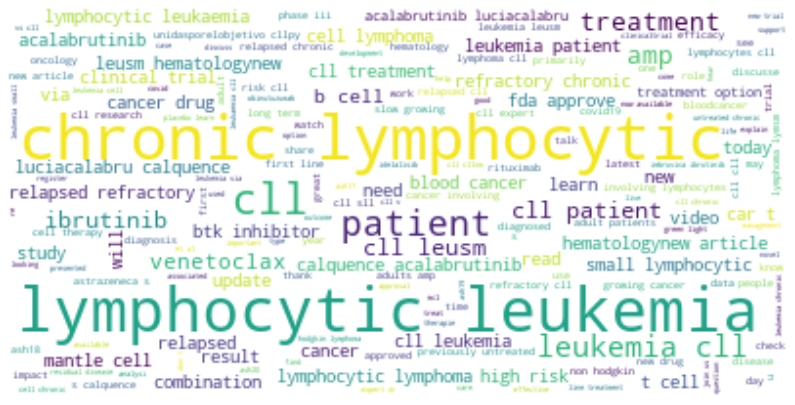

In [26]:
#plotting the frequency of words using Wordcloud library
word_cloud = WordCloud(background_color="white").generate(cleaned_Sentences)
plt.figure(figsize=(14,14))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
#creating a excel sheet Objective 1

word_frequency = pd.DataFrame(mostCommon)
word_frequency.columns=['Entity','Frequency']
word_frequency.to_excel("objective1.xlsx")

### Objective 2

In [16]:
#plotting piechart using Matplotlib
from matplotlib.gridspec import GridSpec
targetCount = sentiment['Analysis'].value_counts()
targetLabel  = sentiment['Analysis'].unique()

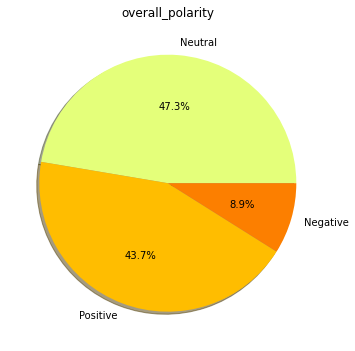

In [40]:
plt.figure(1, figsize=(13,13))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Wistia')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='overall_polarity')
source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [29]:
#creating a excel sheet for Objective 2

tweet_analysis2=sentiment[['tweet_text','tweet_author','Analysis']]
tweet_analysis2.to_excel("objective2.xlsx")